In [2]:
import numpy as np
import math
import os

from PIL import ExifTags
import defusedxml
import shutil
import ultralytics
import shutil
import cv2
from pathlib import Path

KeyboardInterrupt: 

In [ ]:
waypoint1 = "./DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143604_0001_D_Waypoint1.JPG"
exif_data = Image.open(waypoint1).getexif()
exif_data2 = Image.open(waypoint1)._getexif
print(type(exif_data))
print(type(exif_data2))

NameError: name 'Image' is not defined

In [ ]:
print(exif_data)

{296: 2, 282: 72.0, 34853: 734, 34665: 260, 270: 'default', 271: 'DJI', 272: 'M3M', 305: '11.07.00.28', 274: 1, 306: '2025:08:08 14:36:04', 531: 2, 283: 72.0, 40092: b'0\x00.\x009\x00.\x001\x004\x002\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 40094: b's\x00i\x00n\x00g\x00l\x00e\x00'}


In [ ]:
xmp_data = Image.open(waypoint1).getxmp()
print(type(xmp_data))
print()
print(xmp_data)

<class 'dict'>

{'xmpmeta': {'RDF': {'Description': {'about': 'DJI Meta Data', 'ModifyDate': '2025-08-08T14:36:04-04:00', 'CreateDate': '2025-08-08T14:36:04-04:00', 'Make': 'DJI', 'Model': 'M3M', 'format': 'image/jpg', 'Version': '7.0', 'GpsStatus': 'RTK', 'AltitudeType': 'RtkAlt', 'GpsLatitude': '+39.745344789', 'GpsLongitude': '-74.521732158', 'AbsoluteAltitude': '-9.543', 'RelativeAltitude': '+1.997', 'GimbalRollDegree': '+0.00', 'GimbalYawDegree': '+74.40', 'GimbalPitchDegree': '+0.00', 'FlightRollDegree': '+1.10', 'FlightYawDegree': '+74.20', 'FlightPitchDegree': '-3.10', 'FlightXSpeed': '0.2', 'FlightYSpeed': '-0.1', 'FlightZSpeed': '0.0', 'CamReverse': '0', 'GimbalReverse': '0', 'SelfData': '', 'RtkFlag': '50', 'RtkStdLon': '0.00999', 'RtkStdLat': '0.01101', 'RtkStdHgt': '0.02100', 'RtkDiffAge': '1.20000', 'SurveyingMode': '1', 'DewarpFlag': '0', 'DewarpData': '2022-06-08;3713.290000000000,3713.290000000000,7.020000000000,-8.720000000000,-0.112575240000,0.014874430000,-0.0000857

In [ ]:
# waypoint 2
waypoint2 = "./DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG"
xmp_data2 = Image.open(waypoint2).getxmp()
print(xmp_data2.keys())

dict_keys(['xmpmeta'])


In [ ]:
print(type(xmp_data2))
data = xmp_data2["xmpmeta"]["RDF"]["Description"]["GimbalPitchDegree"]
print(type(data))
data = float(data)
print(data > -50)
print(type(data))

<class 'dict'>
<class 'str'>
False
<class 'float'>


In [ ]:
# test write to image_xmp
# import pyexiv2
# test_path = "/Users/thiennguyenba/Documents/School/Research/Density/DJI_20250808143604_0001_D_Waypoint1.JPG"
# img = pyexiv2.Image(test_path)
# metadata = img.read_xmp()
# metadata["Xmp.xmp.RelativeXPosition"] = 10
# img.modify_xmp(metadata)

In [ ]:
import pyexiv2
sample_path = "DJI_20250808143604_0001_D_Waypoint1.JPG"
img = pyexiv2.Image(sample_path)
exif_data = img.read_exif()
print(exif_data)
width = exif_data.get("Exif.Photo.PixelXDimension")
print(type(width))
print(width)


{'Exif.Image.ImageDescription': 'default', 'Exif.Image.Make': 'DJI', 'Exif.Image.Model': 'M3M', 'Exif.Image.Orientation': '1', 'Exif.Image.XResolution': '72/1', 'Exif.Image.YResolution': '72/1', 'Exif.Image.ResolutionUnit': '2', 'Exif.Image.Software': '11.07.00.28', 'Exif.Image.DateTime': '2025:08:08 14:36:04', 'Exif.Image.YCbCrPositioning': '2', 'Exif.Image.ExifTag': '260', 'Exif.Photo.ExposureTime': '1/2000', 'Exif.Photo.FNumber': '320/100', 'Exif.Photo.ExposureProgram': '2', 'Exif.Photo.ISOSpeedRatings': '100', 'Exif.Photo.SensitivityType': '2', 'Exif.Photo.ExifVersion': '48 50 51 48', 'Exif.Photo.DateTimeOriginal': '2025:08:08 14:36:04', 'Exif.Photo.DateTimeDigitized': '2025:08:08 14:36:04', 'Exif.Photo.ComponentsConfiguration': '1 2 3 0', 'Exif.Photo.ShutterSpeedValue': '109658/10000', 'Exif.Photo.ApertureValue': '336/100', 'Exif.Photo.ExposureBiasValue': '0/10', 'Exif.Photo.MaxApertureValue': '297/100', 'Exif.Photo.SubjectDistance': '0/1', 'Exif.Photo.MeteringMode': '1', 'Exif.Ph

In [ ]:
# sample_path2 = "./DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG"
# img2 = pyexiv2.Image(sample_path2)
# sample2 = img2.read_xmp()
# print(sample2)
# altitude = float(sample["Xmp.drone-dji.RelativeAltitude"])
# print(altitude)

In [ ]:
from pyexiv2 import Image
import os
for image_f in os.listdir("./DJI_202508081433_021_PineIslandbog5H3m5x3photo/"):
    img = Image(os.path.join("./DJI_202508081433_021_PineIslandbog5H3m5x3photo/", image_f))
    metadata = img.read_xmp()
    print(metadata)

{'Xmp.xmp.ModifyDate': '2025-08-08T14:53:44-04:00', 'Xmp.xmp.CreateDate': '2025-08-08T14:53:44-04:00', 'Xmp.tiff.Make': 'DJI', 'Xmp.tiff.Model': 'M3M', 'Xmp.dc.format': 'image/jpg', 'Xmp.drone-dji.Version': '1.6', 'Xmp.drone-dji.GpsStatus': 'RTK', 'Xmp.drone-dji.AltitudeType': 'RtkAlt', 'Xmp.drone-dji.GpsLatitude': '+39.745816044', 'Xmp.drone-dji.GpsLongitude': '-74.520464397', 'Xmp.drone-dji.AbsoluteAltitude': '-9.548', 'Xmp.drone-dji.RelativeAltitude': '+2.004', 'Xmp.drone-dji.GimbalRollDegree': '+0.00', 'Xmp.drone-dji.GimbalYawDegree': '+76.30', 'Xmp.drone-dji.GimbalPitchDegree': '-60.00', 'Xmp.drone-dji.FlightRollDegree': '-0.50', 'Xmp.drone-dji.FlightYawDegree': '+76.00', 'Xmp.drone-dji.FlightPitchDegree': '+0.90', 'Xmp.drone-dji.FlightXSpeed': '0.0', 'Xmp.drone-dji.FlightYSpeed': '0.0', 'Xmp.drone-dji.FlightZSpeed': '0.0', 'Xmp.drone-dji.CamReverse': '0', 'Xmp.drone-dji.GimbalReverse': '0', 'Xmp.drone-dji.SelfData': '', 'Xmp.drone-dji.RtkFlag': '50', 'Xmp.drone-dji.RtkStdLon': '0

In [3]:
with open("/Users/thiennguyenba/Documents/School/Research/Density/output/DJI_20250808143611_0002_D_Waypoint2.txt", "r") as file:
    lines = file.readlines()
for line in lines:
    boxlist = line.split(" ")[1:]
    box = [(float(boxlist[0]), float(boxlist[1])), (float(boxlist[2]), float(boxlist[3])),
                   (float(boxlist[4]), float(boxlist[5])), (float(boxlist[6]), float(boxlist[7]))]
    print(box)
    print()

[(0.07207378618644945, 0.09171812792277553), (0.07434502225933654, 0.09096881183743838), (0.07066797776655717, 0.07111473584922429), (0.0683967416936701, 0.07186405193456143)]

[(0.012245744647401751, 0.1509411756864573), (0.013509935321229877, 0.1485727771107179), (0.00036655465761820474, 0.13607538144195525), (-0.0008976370999307343, 0.13844378001769464)]

[(0.07931160204338306, 0.027898682381193123), (0.08697781418309067, -0.0003292606380759645), (0.08457152626731179, -0.001493399015451707), (0.07690531412760417, 0.026734544003817383)]

[(0.11046500928474196, 0.14797638834306276), (0.12218012954249527, 0.14403422078903091), (0.12159853848544035, 0.1409554013829863), (0.10988341822768703, 0.14489756893701813)]

[(0.09230198715672348, 0.029101972512456355), (0.09538921009410511, 0.02902102301648702), (0.09495464671741832, -0.0005018335321675177), (0.09186742378003669, -0.00042088349378988885)]

[(0.059119796752929686, 0.07099825836891352), (0.07731191461736506, 0.06803353273952935), (

In [4]:
import numpy as np
list = np.array([[1, 2], [3, 4]])
print(type(list))
print(list)

<class 'numpy.ndarray'>
[[1 2]
 [3 4]]


In [5]:
import georef2
print(georef2.find_point_projection((0, -3956/2), 5280, 3956, 3, np.radians(-60)))


(np.float64(0.0), np.float64(0.12909433144271817))


In [6]:
img_path = "./DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG"
detection_path = "./output/DJI_20250808143611_0002_D_Waypoint2.txt"
list = georef2.get_detections_coor(img_path, detection_path)
for list_item in list:
    print(list_item)


img width:  5280.0
img height:  3956.0
[-2.42804373  4.06610555]
[-2.49341003  3.62526533]
[-2.68153122  4.60415229]
[-1.93577746  3.61879479]
[-2.6013891   4.59500188]
[-2.51092128  4.17224684]
[-2.64403785  4.41962817]
[-2.57778657  4.02940068]
[-2.37727783  3.80197601]
[-2.27006196  3.91616742]
[-2.35735561  3.9209455 ]
[-2.2784886   3.62929971]
[-2.53387956  3.9984926 ]
[-2.8660039   4.62584584]
[-2.0094947  3.7134533]
[-2.23406409  3.84814056]
[-2.28714048  4.11780291]
[-2.59240855  4.50610508]
[-2.32946765  3.9730546 ]
[-2.52481775  4.62643594]
[-2.40123649  3.73519729]
[-1.9818014   3.72221106]
[-2.62474217  4.05777635]
[-2.20808659  3.88390835]
[-3.14478069  4.63329477]
[-2.55840537  3.84365138]
[-2.46787952  4.41231838]
[-2.30200054  3.57450042]
[-2.62172986  4.3621009 ]
[-2.50452599  3.89558327]
[-2.22557911  3.95109462]
[-2.28157399  3.72393785]
[-2.80460914  4.19184432]
[-2.38717799  4.48458654]
[-2.42001998  4.34679738]
[-2.37794702  4.25506143]
[-2.17803904  4.08693356]
[

In [ ]:
import os
import pyexiv2
img_file_list = sorted(os.listdir("DJI_202508081433_021_PineIslandbog5H3m5x3photo"))
for i in range(13):
    img_path = os.path.join("DJI_202508081433_021_PineIslandbog5H3m5x3photo", img_file_list[i])
    img = pyexiv2.Image(img_path)
    xmp_data = img.read_xmp()
    gps = (float(xmp_data["Xmp.drone-dji.GpsLatitude"]), float(xmp_data["Xmp.drone-dji.GpsLongitude"]))
    cart = georef2.GPS_to_Cartesian(gps)
    print(f"Image: {img_file_list[i]}, GPS: {gps}, Cartesian: {cart}")

Image: DJI_20250808143604_0001_D_Waypoint1.JPG, GPS: (39.745344789, -74.521732158), Cartesian: (np.float64(1307309.3120632013), np.float64(-4720957.818851123))
Image: DJI_20250808143611_0002_D_Waypoint2.JPG, GPS: (39.745353329, -74.521697992), Cartesian: (np.float64(1307311.9651799763), np.float64(-4720956.454155273))
Image: DJI_20250808143617_0003_D_Waypoint3.JPG, GPS: (39.745359453, -74.521664208), Cartesian: (np.float64(1307314.6326602488), np.float64(-4720955.263710784))
Image: DJI_20250808143622_0004_D_Waypoint4.JPG, GPS: (39.745365609, -74.521631117), Cartesian: (np.float64(1307317.2424318425), np.float64(-4720954.086884372))
Image: DJI_20250808143626_0005_D_Waypoint5.JPG, GPS: (39.745371669, -74.521597253), Cartesian: (np.float64(1307319.9177162035), np.float64(-4720952.898996518))
Image: DJI_20250808143632_0006_D_Waypoint6.JPG, GPS: (39.745378856, -74.521563527), Cartesian: (np.float64(1307322.560245625), np.float64(-4720951.637037298))
Image: DJI_20250808143638_0007_D_Waypoint

In [ ]:
import os
import pyexiv2
img_file_list = sorted(os.listdir("DJI_202508081433_021_PineIslandbog5H3m5x3photo"))
for i in range(13):
    img_path = os.path.join("DJI_202508081433_021_PineIslandbog5H3m5x3photo", img_file_list[i])
    img = pyexiv2.Image(img_path)
    xmp_data = img.read_xmp()
    gps = (float(xmp_data["Xmp.drone-dji.GpsLatitude"]), float(xmp_data["Xmp.drone-dji.GpsLongitude"]))
    cart = georef2.GPS_to_Cartesian(gps)
    print(f"Image: {img_file_list[i]}, GPS: {gps}, Cartesian: {cart}")

In [8]:
import matplotlib.pyplot as plt

for i in range(1):
    img1 = pyexiv2.Image(os.path.join("DJI_202508081433_021_PineIslandbog5H3m5x3photo", img_file_list[i]))
    img2 = pyexiv2.Image(os.path.join("DJI_202508081433_021_PineIslandbog5H3m5x3photo", img_file_list[i+1]))
    gps1 = float(img1.read_xmp()['Xmp.drone-dji.GpsLatitude']), float(img1.read_xmp()['Xmp.drone-dji.GpsLongitude'])
    gps2 = float(img2.read_xmp()['Xmp.drone-dji.GpsLatitude']), float(img2.read_xmp()['Xmp.drone-dji.GpsLongitude'])
    cart1 = georef2.GPS_to_Cartesian(gps1)
    cart2 = georef2.GPS_to_Cartesian(gps2)
    vector = np.array([cart2[0]-cart1[0], cart2[1]-cart1[1]])
    delta_y = np.sqrt((cart2[0]-cart1[0])**2 + (cart2[1]-cart1[1])**2)
    e1 = np.array([0, 3])
    # print(vector * e1)
    print(vector)
    print(e1)

[2.65311677 1.36469585]
[0 3]


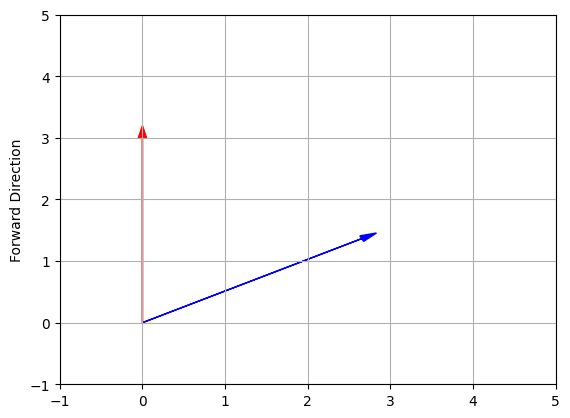

In [23]:
fig, ax = plt.subplots()
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
plt.ylabel("Forward Direction")
ax.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.2, fc='blue', ec='blue')
ax.arrow(0, 0, e1[0], e1[1], head_width=0.1, head_length=0.2, fc='red', ec='red')
ax.grid(True)
plt.show()